## Importing Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Spliting the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['target'], test_size=0.25, random_state=101)

In [6]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2


In [7]:
X_train.shape

(227, 13)

## Checking if dataset is balanced

In [8]:
y_train.mean()

0.5550660792951542

## Balancing the data

In [9]:
sm = SMOTE(random_state=101)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [10]:
X_train.shape

(252, 13)

In [11]:
y_train.shape

(252,)

In [12]:
y_train.mean()

0.5

## Scaling the data

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled[0]

array([0.79166667, 1.        , 0.        , 0.24528302, 0.25342466,
       0.        , 0.5       , 0.        , 0.        , 0.16129032,
       0.5       , 0.        , 0.66666667])

## Building some Models

In [15]:
dt = DecisionTreeClassifier(random_state=101)
dt = dt.fit(X_train_scaled, y_train)

print('CV score:', cross_val_score(dt, X_train_scaled, y_train, cv = 3).mean())
print('DT Train Score:', dt.score(X_train_scaled, y_train))
print('DT Test Score:', dt.score(X_test_scaled, y_test))

CV score: 0.75
DT Train Score: 1.0
DT Test Score: 0.8157894736842105


In [16]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=101)
rf.fit(X_train_scaled, y_train)

print('CV score:', cross_val_score(rf, X_train_scaled, y_train, cv = 3).mean())
print('oob score:', rf.oob_score_)
print('RF Train Score:', rf.score(X_train_scaled, y_train))
print('RF Test Score:', rf.score(X_test_scaled, y_test))

CV score: 0.8293650793650794
oob score: 0.8293650793650794
RF Train Score: 1.0
RF Test Score: 0.8289473684210527


In [17]:
knn = KNeighborsClassifier(n_neighbors=1, leaf_size=1000, p=1)
knn.fit(X_train_scaled, y_train)

print('CV score:', cross_val_score(knn, X_train_scaled, y_train, cv = 3).mean())
print('KNN Train Score:', knn.score(X_train_scaled, y_train))
print('KNN Test Score:', knn.score(X_test_scaled, y_test))

CV score: 0.7857142857142857
KNN Train Score: 1.0
KNN Test Score: 0.7763157894736842


In [18]:
lr = LogisticRegression(random_state=101, solver='lbfgs') #Solver added to disable warnings
lr.fit(X_train_scaled, y_train)

print('CV score:', cross_val_score(lr, X_train_scaled, y_train, cv = 3).mean())
print('LR Train Score:', lr.score(X_train_scaled, y_train))
print('LR Test Score:', lr.score(X_test_scaled, y_test))

CV score: 0.8174603174603176
LR Train Score: 0.8492063492063492
LR Test Score: 0.8421052631578947


In [19]:
svm = SVC(gamma='auto',random_state=101)
svm.fit(X_train_scaled, y_train)

print('CV score:', cross_val_score(svm, X_train_scaled, y_train, cv = 3).mean())
print('SVM Train Score:', svm.score(X_train_scaled, y_train))
print('SVM Test Score:', svm.score(X_test_scaled, y_test))

CV score: 0.7976190476190476
SVM Train Score: 0.8134920634920635
SVM Test Score: 0.8157894736842105


## Hyperparameters Tuning (Testing RF and LR)

In [20]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

In [21]:
rf_grid = RandomForestClassifier(oob_score=True, random_state=101) # creates a new estimator

# Create the parameter grid based on the results of random search 
rf_param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 5, 10],
              'n_estimators': [100, 300, 500]}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
rf_grid_search = GridSearchCV(estimator=rf_grid, param_grid=rf_param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

rf_grid_search.fit(X_train_scaled, y_train)
rf_grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.0min finished


{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [22]:
rf_best_grid = rf_grid_search.best_estimator_
rf_best_grid # Note that it's a classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

In [23]:
print('CV score:', cross_val_score(rf_best_grid, X_train_scaled, y_train, cv = 3).mean())
print('oob score:', rf_best_grid.oob_score_)
print('RF Train Score:', rf_best_grid.score(X_train_scaled, y_train))
print('RF Test Score:', rf_best_grid.score(X_test_scaled, y_test))

CV score: 0.8492063492063492
oob score: 0.8373015873015873
RF Train Score: 0.9365079365079365
RF Test Score: 0.8552631578947368


In [24]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 101,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
lr_grid = LogisticRegression(random_state=101)

# Create the parameter grid based on the results of random search 
lr_param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
              'C': [1, 2, 3],
              'max_iter': [50, 100, 200],
              'multi_class': ['warn', 'multinomial']}

# Instantiate the grid search model (n_jobs = -1 sets to use the max number of processors)
lr_grid_search = GridSearchCV(estimator=lr_grid, param_grid=lr_param_grid, cv=3, scoring='precision', n_jobs=-1, verbose=2)

lr_grid_search.fit(X_train_scaled, y_train)
lr_grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    4.1s finished


{'C': 2, 'max_iter': 50, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

In [26]:
lr_best_grid = lr_grid_search.best_estimator_
lr_best_grid # Note that it's a classifier

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=101, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
print('CV score:', cross_val_score(lr_best_grid, X_train_scaled, y_train, cv = 3).mean())
print('RF Train Score:', lr_best_grid.score(X_train_scaled, y_train))
print('RF Test Score:', lr_best_grid.score(X_test_scaled, y_test))

CV score: 0.8253968253968255
RF Train Score: 0.8492063492063492
RF Test Score: 0.8421052631578947


In [28]:
models = {rf_best_grid.score(X_test_scaled, y_test): rf_best_grid, 
          lr_best_grid.score(X_test_scaled, y_test): lr_best_grid}

best_model = models[max(models)]
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=101, verbose=0, warm_start=False)

## Evaluation Results

In [29]:
pred = best_model.predict(X_test_scaled)
pred[:15]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [30]:
results = pd.DataFrame()
results['Prediction']=pred
results['Real']=list(y_test)
results['Status']=['Right' if pred[n] == list(y_test)[n] else 'Wrong' for n in range(len(pred))]

results.head(20)

,Prediction,Real,Status
0,0,0,Right
1,1,1,Right
2,1,1,Right
3,1,1,Right
4,0,0,Right
5,1,1,Right
6,1,1,Right
7,0,0,Right
8,0,0,Right
9,1,1,Right


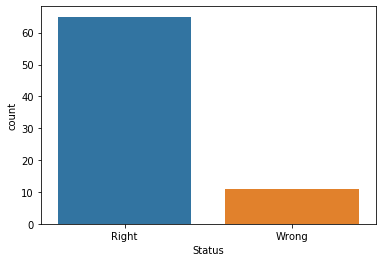

In [31]:
sns.countplot(results['Status'])
plt.show()

In [32]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.90      0.83      0.86        42

   micro avg       0.86      0.86      0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76

